In [16]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import kagglehub

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mateuscco/toy-network-datasets")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\21268\.cache\kagglehub\datasets\mateuscco\toy-network-datasets\versions\1


In [18]:
# --- pick a Pajek .net file (prefer a well-known one if present) ---
net_files = glob.glob(os.path.join(path, "**", "*.net"), recursive=True)
if not net_files:
    raise FileNotFoundError("No .net (Pajek) files found in the dataset.")
# If you want a specific one, put part of its name here (e.g., "karate")
preferred = [p for p in net_files if "karate" in os.path.basename(p).lower()]
pajek_path = preferred[0] if preferred else net_files[0]
print("Using:", pajek_path)

# 2) Load graph with NetworkX (Pajek)
G_raw = nx.read_pajek(pajek_path)
# Simplify to an undirected simple Graph for plotting & degrees
G = nx.Graph(G_raw) if isinstance(G_raw, (nx.MultiGraph, nx.MultiDiGraph, nx.DiGraph)) else G_raw

print(f"Nodes: {G.number_of_nodes()} | Edges: {G.number_of_edges()}")



Using: C:\Users\21268\.cache\kagglehub\datasets\mateuscco\toy-network-datasets\versions\1\26KeroNetwork.net
Nodes: 135 | Edges: 318


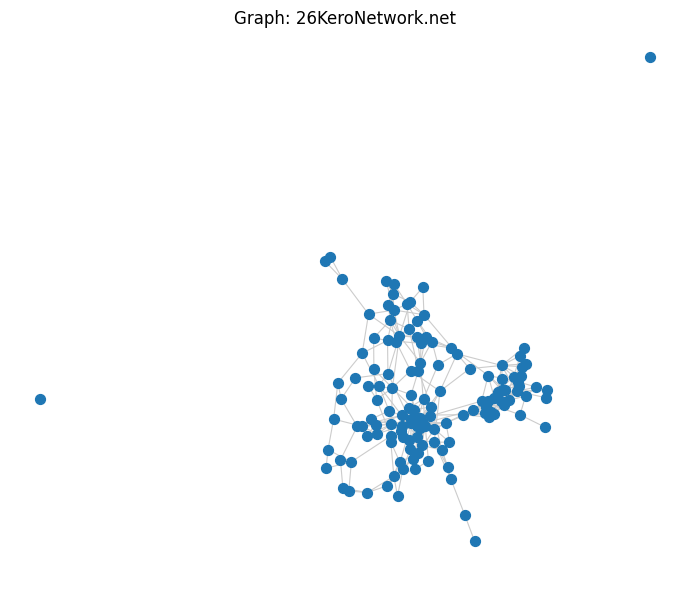

In [19]:

# 3) Visualize the graph (matplotlib)
plt.figure(figsize=(7,6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(
    G, pos,
    with_labels=False,
    node_size=50,
    node_color="#1f77b4",
    edge_color="#cccccc",
    width=0.8
)
plt.title(f"Graph: {os.path.basename(pajek_path)}")
plt.axis("off")
plt.tight_layout()
plt.show()


Sample degrees: [('1', 3), ('2', 2), ('3', 2), ('4', 4), ('5', 4), ('6', 2), ('7', 3), ('8', 3), ('9', 4), ('10', 7)]


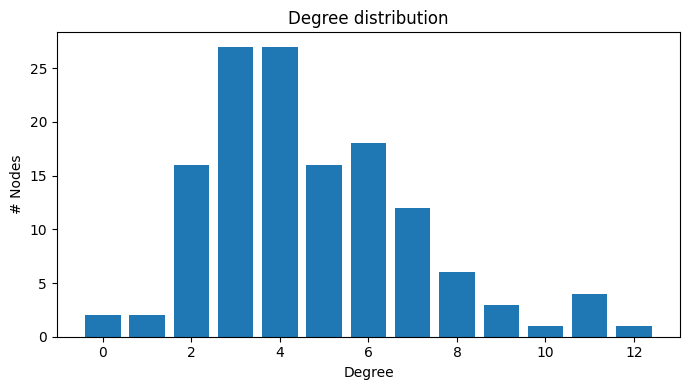

In [20]:
# 4) Degree of each node
degrees = dict(G.degree())
print("Sample degrees:", list(degrees.items())[:10])

# 5) Degree distribution (histogram)
deg_vals = np.array(list(degrees.values()), dtype=int)
bins = np.arange(deg_vals.min(), deg_vals.max()+2)  # integer bins
plt.figure(figsize=(7,4))
plt.hist(deg_vals, bins=bins, align="left", rwidth=0.8)
plt.xlabel("Degree")
plt.ylabel("# Nodes")
plt.title("Degree distribution")
plt.tight_layout()
plt.show()


In [22]:
from pyvis.network import Network
import networkx as nx

G = nx.karate_club_graph()
net = Network(height="650px", width="100%", notebook=True, directed=False)
net.from_nx(G)
net.show("graph.html")  # open graph.html


graph.html
